## Nerlnet Example Of Experiment

In [1]:
import set_jupyter_env
from apiServer import *

### Starting ApiServer
ApiServer is the API for user that wants to use Nerlnet, running distributed experiment over a Nerlnet cluster.  
A Nerlnet cluster consists physical compute hardware, devices, that host software entities of the following types:   
Source - Streams data from CSV toward model on the edge of the network  
Router - Connects entities one to another. Support broadcast and unicast communication patterns and based on static table routing of shortest path between two points. 
Worker - A state machine of neural network with 3 states: Idle, Training, Prediction. A worker receives batches from the network (generated by sources) and performs train/predict flow.
Client - Hosts several workers and manage its state machines and gives them an envelope to communicate with other entities.

In [2]:
api_server_instance = ApiServer()
api_server_instance.showJsons()


Distributed Configuration Files
--------------------

0.	dc_synt_distributed_w5_c3_6r_3s_3d.json
1.	dc_test_synt_1d_2c_1s_4r_4w.json
2.	dc_test_synt_1d_2c_2s_4r_4w.json

Connection Map Files
--------------------

0.	conn_1Router1Client1S.json
1.	conn_1Router1Client2S.json
2.	conn_1Router2Clients1S.json
3.	conn_1Router3Clients1S.json
4.	conn_1Router4Clients1S.json
5.	conn_1Router4Clients1fed.json
6.	conn_1Router4Clients2Sources.json
7.	conn_1Router4Clients2Sources1fed.json
8.	conn_2R4C1S_health_david.json
9.	conn_2Router2Clients1Source.json
10.	conn_2Router2Clients1Source_david.json
11.	conn_2Router2Clients2Source.json
12.	conn_2Router2ClientsGUI.json
13.	conn_2Router3Clients.json
14.	conn_3Router3Clients.json
15.	conn_6RouterCycle6Clients1Source.json
16.	conn_6RouterCycle8Clients1Source.json
17.	conn_6RouterLine6Clients1Source.json
18.	conn_8RouterCycle8Clients1Source.json
19.	conn_synt_distributed_w5_c3_6r_3s_3d.json
20.	conn_test_synt_1d_2c_1s_4r_4w.json
21.	conn_test_synt_1d_2c_2s_

### Input Json Files of Nerlnet
TODO

In [4]:
dc_idx = 0
conn_idx = 19
exp_idx = 18
api_server_instance.setJsons(dc_idx, conn_idx, exp_idx)
dc_json , connmap_json, exp_flow_json = api_server_instance.getUserJsons()

### Run Nerlnet
On all devices that perticipate the experiment execute ./NerlnetRun.sh (after install script with sudo and build script).
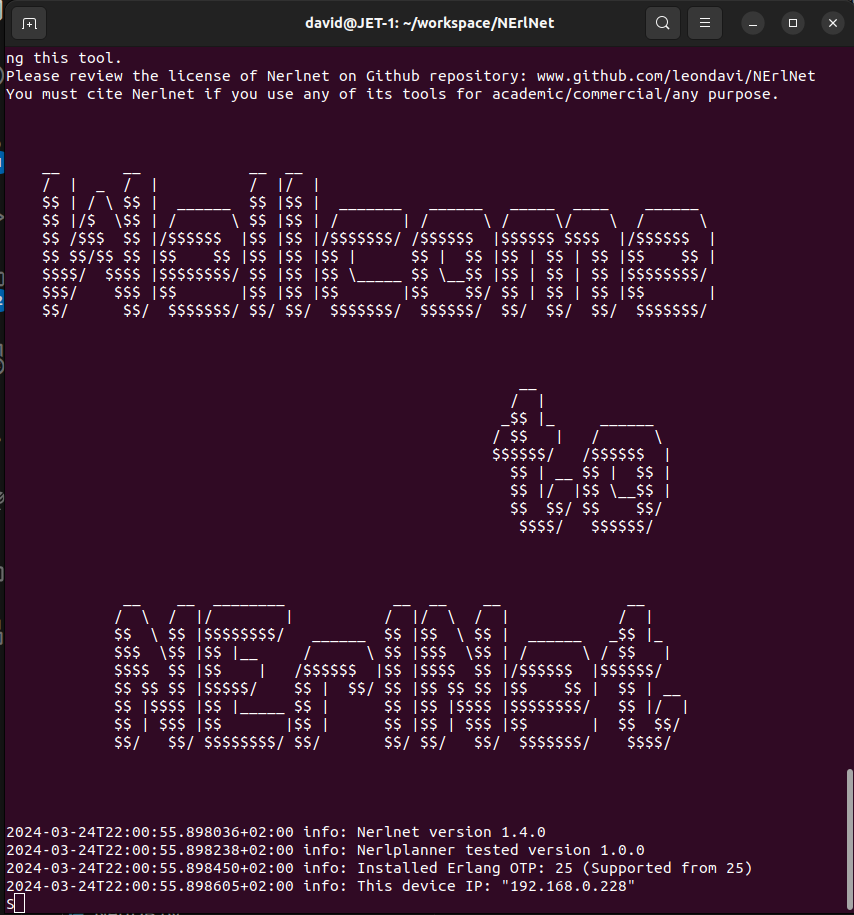

In [5]:
experiment_name = "test_exp"
api_server_instance.initialization(experiment_name, dc_json , connmap_json, exp_flow_json) # start to debug
api_server_instance.send_jsons_to_devices()

[INFO][2024-03-24 22:17:02,656] 
Network components:
                 Receiver's Address: http://192.168.0.210:8845
                 Frequency: 50 [batches/sec]
                 Batchsize: 100 [samples]
                 devicesIp: ['192.168.0.210', '192.168.0.226', '192.168.0.228']
                 mainServerIp: 192.168.0.210
                 mainServerPort: 8844
                 apiServerIp: 192.168.0.210
                 apiServerPort: 8845
                 Clients: ['c1', 'c2', 'c3']
                 Workers: ['w1', 'w2', 'w3', 'w4', 'w5']
                 Sources: ['s1', 's2', 's3']
                 Routers: ['r1', 'r2', 'r3', 'r4', 'r5', 'r6']
[INFO][2024-03-24 22:17:02,657] Connections:
[INFO][2024-03-24 22:17:02,658] 		 r1 : ['mainServer', 'r2']
[INFO][2024-03-24 22:17:02,658] 		 r2 : ['r3', 's1']
[INFO][2024-03-24 22:17:02,659] 		 r3 : ['r4', 'c1', 's2']
[INFO][2024-03-24 22:17:02,660] 		 r4 : ['r5', 'c2', 's3']
[INFO][2024-03-24 22:17:02,660] 		 r5 : ['r6', 'c3']
[INFO][2024-0

 * Serving Flask app 'receiver'
 * Debug mode: off


[INFO][2024-03-24 22:17:04,691] *** Remember to execute NerlnetRun.sh on each device before running the experiment! ***
[INFO][2024-03-24 22:17:05,597] Sending distributed configurations to devices is completed


In [6]:
next_expertiment_phase_exist = True 
api_server_instance.run_current_experiment_phase() # blocking - deppended acks from mainserver
stats = api_server_instance.get_experiment_flow(experiment_name).generate_stats()

[INFO][2024-03-24 22:17:13,503] Experiment phase: training_phase of type training starts running...
[INFO][2024-03-24 22:17:13,504] Sending data to sources
[INFO][2024-03-24 22:17:18,873] Data is ready in sources
[INFO][2024-03-24 22:17:18,874] Phase training requested from Main Server
[INFO][2024-03-24 22:17:44,272] Processing experiment phase data
[INFO][2024-03-24 22:17:44,285] Processing experiment phase data completed
[INFO][2024-03-24 22:17:44,286] Start generating communication statistics for training_phase of type training
[INFO][2024-03-24 22:17:44,286] Statistics requested from Main Server
[INFO][2024-03-24 22:17:44,795] Statistics received from Main Server
[INFO][2024-03-24 22:17:44,797] Phase of training_phase training completed


In [7]:
next_expertiment_phase_exist = api_server_instance.next_experiment_phase()
api_server_instance.run_current_experiment_phase()
stats_predict = api_server_instance.get_experiment_flow(experiment_name).generate_stats()
stats_train = stats

[INFO][2024-03-24 22:19:50,124] Experiment phase: prediction_phase of type prediction starts running...
[INFO][2024-03-24 22:19:50,126] Sending data to sources
[INFO][2024-03-24 22:19:57,240] Data is ready in sources
[INFO][2024-03-24 22:19:57,241] Phase prediction requested from Main Server
[INFO][2024-03-24 22:22:26,243] Processing experiment phase data
[INFO][2024-03-24 22:22:26,739] Processing experiment phase data completed
[INFO][2024-03-24 22:22:26,741] Start generating communication statistics for prediction_phase of type prediction
[INFO][2024-03-24 22:22:26,745] Statistics requested from Main Server
[INFO][2024-03-24 22:22:26,946] Statistics received from Main Server
[INFO][2024-03-24 22:22:26,950] Phase of prediction_phase prediction completed


## Communication Network Statistics

In [14]:
stats_train.get_communication_stats_workers()
print("")

communication_stats_workers_dict: OrderedDict([('w1', {'bytes_received': 0, 'bytes_sent': 0, 'bad_messages': 0, 'batches_received_train': 384, 'batches_received_predict': 0, 'batches_dropped_train': 16, 'batches_dropped_predict': 0, 'batches_sent_train': 0, 'empty_batches': 0, 'batches_sent_predict': 0, 'average_time_training': 0, 'average_time_prediction': 0, 'acc_time_training': 0, 'acc_time_prediction': 0, 'nan_loss_count': 0}), ('w2', {'bytes_received': 0, 'bytes_sent': 0, 'bad_messages': 0, 'batches_received_train': 388, 'batches_received_predict': 0, 'batches_dropped_train': 12, 'batches_dropped_predict': 0, 'batches_sent_train': 0, 'empty_batches': 0, 'batches_sent_predict': 0, 'average_time_training': 0, 'average_time_prediction': 0, 'acc_time_training': 0, 'acc_time_prediction': 0, 'nan_loss_count': 0}), ('w3', {'bytes_received': 0, 'bytes_sent': 0, 'bad_messages': 0, 'batches_received_train': 400, 'batches_received_predict': 0, 'batches_dropped_train': 0, 'batches_dropped_pre

In [15]:
stats_train.get_communication_stats_sources()
print("")

communication_stats_sources_dict: OrderedDict([('s1', {'messages_received': 4, 'messages_sent': 2, 'messages_dropped': 0, 'bytes_received': 0, 'bytes_sent': 0, 'bad_messages': 0, 'batches_sent': 400}), ('s2', {'messages_received': 4, 'messages_sent': 2, 'messages_dropped': 0, 'bytes_received': 0, 'bytes_sent': 0, 'bad_messages': 0, 'batches_sent': 400}), ('s3', {'messages_received': 4, 'messages_sent': 2, 'messages_dropped': 0, 'bytes_received': 0, 'bytes_sent': 0, 'bad_messages': 0, 'batches_sent': 1000})])



In [16]:
stats_train.get_communication_stats_clients()
print("")

communication_stats_clients_dict: OrderedDict([('c1', {'messages_received': 1578, 'messages_sent': 1578, 'messages_dropped': 0, 'bytes_received': 22556, 'bytes_sent': 22556, 'bad_messages': 0, 'batches_received': 0, 'batches_dropped': 0, 'batches_sent': 0}), ('c2', {'messages_received': 1603, 'messages_sent': 1603, 'messages_dropped': 0, 'bytes_received': 23131, 'bytes_sent': 23131, 'bad_messages': 0, 'batches_received': 0, 'batches_dropped': 0, 'batches_sent': 0}), ('c3', {'messages_received': 404, 'messages_sent': 404, 'messages_dropped': 0, 'bytes_received': 5800, 'bytes_sent': 5800, 'bad_messages': 0, 'batches_received': 0, 'batches_dropped': 0, 'batches_sent': 0})])



In [18]:
stats_train.get_communication_stats_routers()
print("")

communication_stats_routers_dict: OrderedDict([('r1', {'messages_received': 1816, 'messages_sent': 1816, 'messages_dropped': 0, 'bytes_received': 0, 'bytes_sent': 0, 'bad_messages': 0}), ('r2', {'messages_received': 2191, 'messages_sent': 2192, 'messages_dropped': 0, 'bytes_received': 0, 'bytes_sent': 0, 'bad_messages': 0}), ('r3', {'messages_received': 2988, 'messages_sent': 2993, 'messages_dropped': 0, 'bytes_received': 0, 'bytes_sent': 0, 'bad_messages': 0}), ('r4', {'messages_received': 2409, 'messages_sent': 2413, 'messages_dropped': 0, 'bytes_received': 0, 'bytes_sent': 0, 'bad_messages': 0}), ('r5', {'messages_received': 406, 'messages_sent': 406, 'messages_dropped': 0, 'bytes_received': 0, 'bytes_sent': 0, 'bad_messages': 0}), ('r6', {'messages_received': 1, 'messages_sent': 0, 'messages_dropped': 0, 'bytes_received': 0, 'bytes_sent': 0, 'bad_messages': 0})])



In [20]:
stats_predict.get_communication_stats_routers()
print("")

communication_stats_routers_dict: OrderedDict([('r1', {'messages_received': 4870, 'messages_sent': 4871, 'messages_dropped': 0, 'bytes_received': 0, 'bytes_sent': 0, 'bad_messages': 0}), ('r2', {'messages_received': 6424, 'messages_sent': 6427, 'messages_dropped': 0, 'bytes_received': 0, 'bytes_sent': 0, 'bad_messages': 0}), ('r3', {'messages_received': 8714, 'messages_sent': 8725, 'messages_dropped': 0, 'bytes_received': 0, 'bytes_sent': 0, 'bad_messages': 0}), ('r4', {'messages_received': 6027, 'messages_sent': 6036, 'messages_dropped': 0, 'bytes_received': 0, 'bytes_sent': 0, 'bad_messages': 0}), ('r5', {'messages_received': 1614, 'messages_sent': 1615, 'messages_dropped': 0, 'bytes_received': 0, 'bytes_sent': 0, 'bad_messages': 0}), ('r6', {'messages_received': 3, 'messages_sent': 2, 'messages_dropped': 0, 'bytes_received': 0, 'bytes_sent': 0, 'bad_messages': 0})])



## NN Model statistics

In [22]:
stats_train.get_loss_ts()

,w3,w4,w1,w2,w5
0,0.255888,0.255999,0.254103,0.254752,0.253468
1,0.253756,0.252581,0.252884,0.253003,0.252074
2,0.251843,0.252646,0.248765,0.250787,0.252214
3,0.252858,0.250252,0.251154,0.250464,0.253593
4,0.247913,0.252460,0.248101,0.247053,0.246002
...,...,...,...,...,...
395,0.006486,0.009507,NaN,NaN,NaN
396,0.006557,0.008696,NaN,NaN,NaN
397,0.005981,NaN,NaN,NaN,NaN
398,0.009466,NaN,NaN,NaN,NaN


In [23]:
stats_train.get_min_loss()

OrderedDict([('w3', 0.0036152475513517857),
             ('w4', 0.006710559595376253),
             ('w1', 0.0034052440896630287),
             ('w2', 0.006234835367649794),
             ('w5', 0.03249622881412506)])

In [25]:
stats_train.get_loss_foh_missing() # not supported yet

In [37]:
import pprint
confusion_matrix_source_dict, confusion_matrix_worker_dict = stats_predict.get_confusion_matrices()
model_performance_dict = stats_predict.get_model_performence_stats(confusion_matrix_worker_dict, show=False)
pprint.pprint(model_performance_dict)

OrderedDict([(('w4', 'Norm(0:1)'),
              OrderedDict([('TN', 45182),
                           ('FP', 0),
                           ('FN', 0),
                           ('TP', 14818),
                           ('Accuracy', 1.0),
                           ('Balanced Accuracy', 1.0),
                           ('Precision', 1.0),
                           ('Recall', 1.0),
                           ('True Negative Rate', 1.0),
                           ('Informedness', 1.0),
                           ('F1', 1.0)])),
             (('w4', 'Norm(4:1)'),
              OrderedDict([('TN', 45074),
                           ('FP', 16),
                           ('FN', 0),
                           ('TP', 14910),
                           ('Accuracy', 0.9997333333333334),
                           ('Balanced Accuracy', 0.999822577068086),
                           ('Precision', 0.9989280450221091),
                           ('Recall', 1.0),
                           ('Tru